In [3]:
#importing various libraries to be used in the EDA analysis of the financial dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
df = pd.read_csv('Financial.csv')



In [ ]:
#checking the number of columns and rows
df.shape

(23524, 13)

initially before data cleaning the dataset has 13 columns and 23524 rows 

In [ ]:
df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [ ]:
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

from here we wil start cleaning our data first to clear out anomalies and nulls.
from here we can see that the quantittives are year ,household size and respondent age

In [ ]:
#non- missing values
df.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

In [ ]:
df.describe()

,year,household_size,Respondent Age
count,23482.000000,23482.000000,23482.000000
mean,2016.979048,3.682863,38.760881
std,0.900144,2.280128,16.560464
min,2016.000000,0.000000,0.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


the above shows the various statistical values of the dataset before cleaning it

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [6]:
#drop any null values on country column
df = df[df['country'].notna()]

In [7]:
df = df[df['household_size'].notna()]

In [ ]:
df.shape

(23482, 13)

So now we start our univariate analysis by asking ourself the question on whether the respondent age determines whether the interviewee gets a bank account

In [8]:
df['Respondent Age'].fillna(0, inplace=True)

In [9]:
df1 = df.fillna(0)

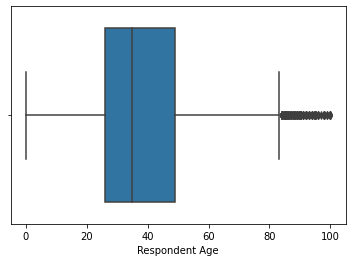

In [10]:
sns.boxplot(x=df1['Respondent Age'])

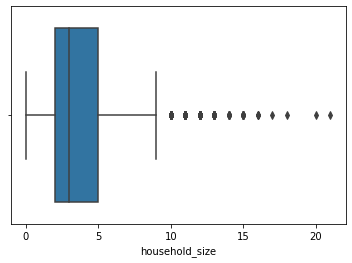

In [11]:
sns.boxplot(x=df1['household_size'])

In [ ]:
# removal of all outlierd
df1 = ([df1['household_size']]< 10).all(axis=1)

TypeError: ignored

In [24]:
df1 = ([df1['Respondent Age ']]< 80).all(axis=1)

KeyError: ignored

THE FOLLOWING DATA CLEANING WILL SUMMARISE IT ALL ACROSS THE VARIOUS ANALYSISES...SO THE DATASET FROMS WILL BE USED ACROSS THE EDA

on various ways to figure out the metrics of success to ensure that this data gives us the best is that first find the quantitative variables and various variables which can corelate to the data that we have on which the data has then separate the variables into various countries 

In [12]:
df1.describe()

,year,household_size,Respondent Age
count,23482.000000,23482.000000,23482.000000
mean,2016.979048,3.682863,38.760881
std,0.900144,2.280128,16.560464
min,2016.000000,0.000000,0.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


from this code we can clearly see the median,mean,quartiles and other various forms of statistical data


In [13]:
import statistics

In [14]:
# let us find out the mode of the two columns to know which is the most common age and household size
mode_household = df1['household_size'].mode()
print(mode_household)
mode_respondent = df1['Respondent Age'].mode()
print(mode_respondent)

0    2.0
dtype: float64
0    30.0
dtype: float64


In [ ]:
df1.shape

(23482, 13)

In [15]:
g= df1.groupby(df.country)
g.head(10)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [16]:
Kenya = g.get_group("Kenya")
print(Kenya)

     country  year  ...              Level of Educuation                Type of Job
0      Kenya  2018  ...              Secondary education              Self employed
1      Kenya  2018  ...              No formal education       Government Dependent
2      Kenya  2018  ...  Vocational/Specialised training              Self employed
3      Kenya  2018  ...                Primary education  Formally employed Private
4      Kenya  2018  ...                Primary education        Informally employed
...      ...   ...  ...                              ...                        ...
6063   Kenya  2018  ...                Primary education       Remittance Dependent
6064   Kenya  2018  ...              Secondary education       Remittance Dependent
6065   Kenya  2018  ...              No formal education        Farming and Fishing
6066   Kenya  2018  ...                Primary education              Self employed
6067   Kenya  2018  ...                Primary education        Farming and 

In [17]:
Rwanda = g.get_group("Rwanda")
print(Rwanda)

      country  year  ...  Level of Educuation           Type of Job
6068   Rwanda  2016  ...  Secondary education  Remittance Dependent
6069   Rwanda  2016  ...  Secondary education         Self employed
6070   Rwanda  2016  ...  No formal education   Farming and Fishing
6071   Rwanda  2016  ...   Tertiary education   Informally employed
6072   Rwanda  2016  ...    Primary education   Informally employed
...       ...   ...  ...                  ...                   ...
14798  Rwanda  2016  ...    Primary education   Farming and Fishing
14799  Rwanda  2016  ...  No formal education  Remittance Dependent
14800  Rwanda  2016  ...    Primary education   Farming and Fishing
14801  Rwanda  2016  ...    Primary education   Informally employed
14802  Rwanda  2016  ...  No formal education   Farming and Fishing

[8727 rows x 13 columns]


In [18]:
Tanzania = g.get_group("Tanzania")
print(Tanzania)

        country  year  ...  Level of Educuation                Type of Job
14803  Tanzania  2017  ...  Secondary education                  No Income
14804  Tanzania  2017  ...  No formal education              Self employed
14805  Tanzania  2017  ...  No formal education                  No Income
14806  Tanzania  2017  ...    Primary education       Remittance Dependent
14807  Tanzania  2017  ...   Tertiary education  Formally employed Private
...         ...   ...  ...                  ...                        ...
21418  Tanzania  2017  ...    Primary education              Self employed
21419  Tanzania  2017  ...    Primary education              Self employed
21420  Tanzania  2017  ...    Primary education  Formally employed Private
21421  Tanzania  2017  ...    Primary education              Self employed
21422  Tanzania  2017  ...    Primary education              Self employed

[6592 rows x 13 columns]


In [50]:
Uganda = g.get_group("Uganda")
print(Uganda)

      country  year  ...  Level of Educuation    Type of Job
21423  Uganda  2018  ...    Primary education   Other Income
21424  Uganda  2018  ...  Secondary education  Self employed
21425  Uganda  2018  ...    Primary education  Self employed
21426  Uganda  2018  ...    Primary education   Other Income
21427  Uganda  2018  ...  Secondary education   Other Income
...       ...   ...  ...                  ...            ...
23519  Uganda  2018  ...  No formal education   Other Income
23520  Uganda  2018  ...  Secondary education   Other Income
23521  Uganda  2018  ...    Primary education   Other Income
23522  Uganda  2018  ...  Secondary education  Self employed
23523  Uganda  2018  ...  Secondary education      No Income

[2095 rows x 13 columns]


from this we can see that there are 
6068 Kenyans,
8727 Rwandese,
6592 Tanzanians &
2095 Ugandans
who were involved in the survey



THE QUESTION ON THIS UNIVARIATE ANALYSIS here is based on one quantitative variable which is household size and more on the value of it that most respondent have a bank account


In [30]:
j= df1.groupby('Has a Bank account')
yes = j.get_group("Yes")
yes.head()



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [31]:
c = yes[['Has a Bank account','Respondent Age']]
c.head(10)

,Has a Bank account,Respondent Age
0,Yes,24.0
2,Yes,26.0
8,Yes,54.0
11,Yes,69.0
17,Yes,27.0
21,Yes,32.0
32,Yes,62.0
42,Yes,80.0
54,Yes,22.0
56,Yes,50.0


In [37]:
d = yes[['Has a Bank account','household_size']]
d.head(10)

,Has a Bank account,household_size
0,Yes,3.0
2,Yes,5.0
8,Yes,3.0
11,Yes,3.0
17,Yes,6.0
21,Yes,1.0
32,Yes,4.0
42,Yes,3.0
54,Yes,1.0
56,Yes,6.0


In [33]:
e = yes[['Has a Bank account','household_size','Respondent Age']]
e.head(10)

,Has a Bank account,household_size,Respondent Age
0,Yes,3.0,24.0
2,Yes,5.0,26.0
8,Yes,3.0,54.0
11,Yes,3.0,69.0
17,Yes,6.0,27.0
21,Yes,1.0,32.0
32,Yes,4.0,62.0
42,Yes,3.0,80.0
54,Yes,1.0,22.0
56,Yes,6.0,50.0


In [35]:
d.describe()

,household_size
count,3306.000000
mean,3.559589
std,2.216208
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,17.000000


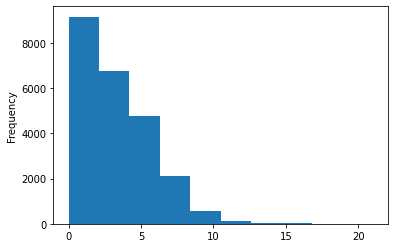

In [ ]:
df1['household_size'].plot.hist()

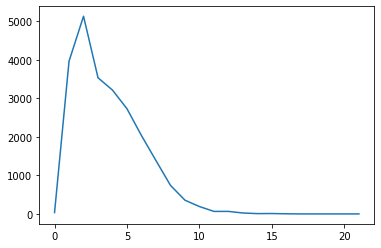

In [ ]:
df1['household_size'].value_counts().sort_index().plot.line()

In [36]:
d.mode()

,Has a Bank account,household_size
0,Yes,1.0


from the univarate analysis above we can clearly see that the type of household size that would most likely have a bank account is that has a value of one

BIVARIATE ANALYSIS

In [46]:
j= df1.groupby('Has a Bank account')
yes = j.get_group("Yes")
e = yes[['Has a Bank account','household_size','Respondent Age']]
e.head(10)

,Has a Bank account,household_size,Respondent Age
0,Yes,3.0,24.0
2,Yes,5.0,26.0
8,Yes,3.0,54.0
11,Yes,3.0,69.0
17,Yes,6.0,27.0
21,Yes,1.0,32.0
32,Yes,4.0,62.0
42,Yes,3.0,80.0
54,Yes,1.0,22.0
56,Yes,6.0,50.0


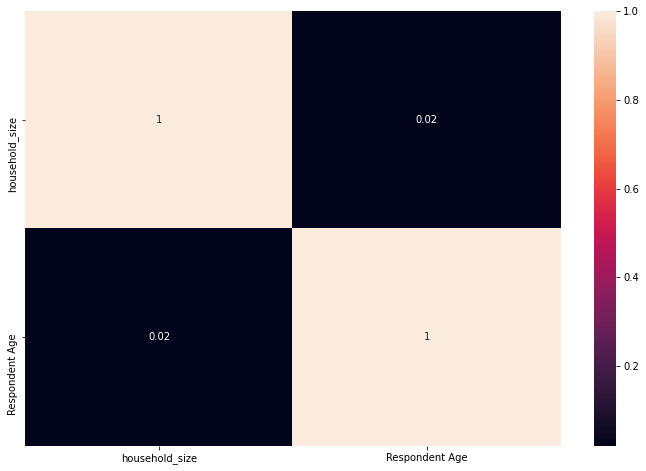

In [45]:
#find correlation between variables
plt.figure(figsize=(12, 8))

e_corr = e.corr()
sns.heatmap(e_corr, 
            xticklabels = e_corr.columns.values,
            yticklabels = e_corr.columns.values,
            annot = True);

<function matplotlib.pyplot.show>

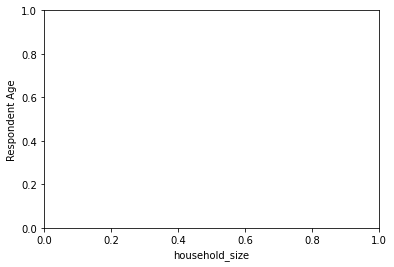

In [ ]:
plt.scatter


plt.xlabel('household_size')
plt.ylabel('Respondent Age')
plt.show

The correlation between household size and respondent age is below zero thus are directly proportional

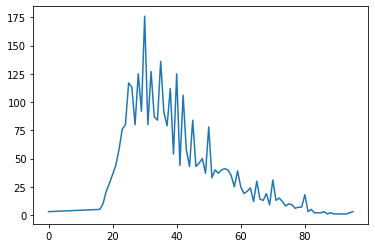

In [47]:
e['Respondent Age'].value_counts().sort_index().plot.line()

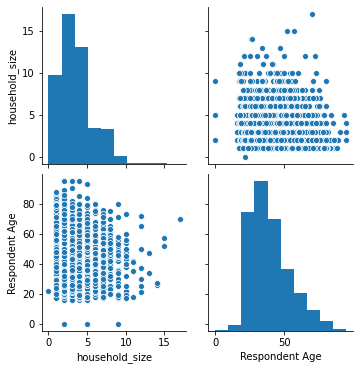

In [43]:
sns.pairplot(e)
plt.show()

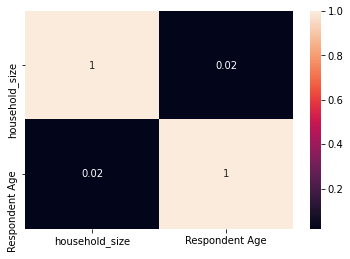

In [42]:
sns.heatmap(e.corr(),annot=True)
plt.show()

In [48]:
e.describe()

,household_size,Respondent Age
count,3306.000000,3306.000000
mean,3.559589,39.570780
std,2.216208,14.383508
min,0.000000,0.000000
25%,2.000000,29.000000
50%,3.000000,36.000000
75%,5.000000,48.000000
max,17.000000,95.000000


In [41]:
e.mode()

,Has a Bank account,household_size,Respondent Age
0,Yes,1.0,30.0


from the above visualizations we see an direct proportoinality between the quantitative variables used in this analysis which are; household size and respondent age....so an increase on either both coul potentially increase the other

from the analysis we can see that the people to most likely have a bank account  are those about thirty years of age and those of about a houseold size of about thirty

MULTIVARIATE ANALYSIS ON PCA REDUCTION TECHNIQUE


In [52]:
h = df1.drop('country', 1)
i = df1['country']
print(h)

       year  ...                Type of Job
0      2018  ...              Self employed
1      2018  ...       Government Dependent
2      2018  ...              Self employed
3      2018  ...  Formally employed Private
4      2018  ...        Informally employed
...     ...  ...                        ...
23519  2018  ...               Other Income
23520  2018  ...               Other Income
23521  2018  ...               Other Income
23522  2018  ...              Self employed
23523  2018  ...                  No Income

[23482 rows x 12 columns]


In [53]:
from sklearn.model_selection import train_test_split

h_train, h_test, i_train, i_test = train_test_split(h, i, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
h_train = sc.fit_transform(h_train)
h_test = sc.transform(h_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
h_train = pca.fit_transform(h_train)
h_test = pca.transform(h_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
h_train = pca.fit_transform(h_train)
h_test = pca.transform(h_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(h_train, i_train)
#
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(i_test, i_pred)
print(cm)
print('Accuracy' , accuracy_score(i_test, i_pred))

In [59]:
k= Kenya.groupby('Has a Bank account')
yes2 = k.get_group("Yes")
l= yes2[['country','Has a Bank account','household_size','Respondent Age']]
l.head(10)

,country,Has a Bank account,household_size,Respondent Age
0,Kenya,Yes,3.0,24.0
2,Kenya,Yes,5.0,26.0
8,Kenya,Yes,3.0,54.0
11,Kenya,Yes,3.0,69.0
17,Kenya,Yes,6.0,27.0
21,Kenya,Yes,1.0,32.0
32,Kenya,Yes,4.0,62.0
42,Kenya,Yes,3.0,80.0
54,Kenya,Yes,1.0,22.0
56,Kenya,Yes,6.0,50.0


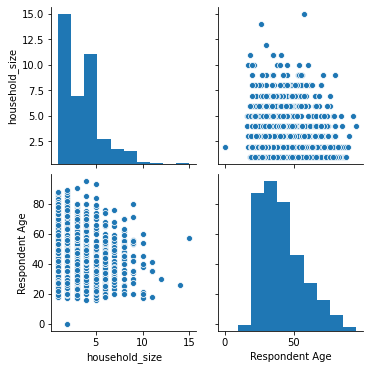

In [64]:
sns.pairplot(l)
plt.show()

In [76]:
l.describe()

,household_size,Respondent Age
count,1521.000000,1521.000000
mean,3.407627,40.858646
std,2.101577,15.523976
min,1.000000,0.000000
25%,2.000000,29.000000
50%,3.000000,38.000000
75%,5.000000,50.000000
max,15.000000,95.000000


In [77]:
l.mode()

,country,Has a Bank account,household_size,Respondent Age
0,Kenya,Yes,1.0,30.0


In [61]:
m= Rwanda.groupby('Has a Bank account')
yes3 = m.get_group("Yes")
n= yes3[['country','Has a Bank account','household_size','Respondent Age']]
n.head(10)

,country,Has a Bank account,household_size,Respondent Age
6069,Rwanda,Yes,4.0,26.0
6071,Rwanda,Yes,1.0,41.0
6077,Rwanda,Yes,4.0,28.0
6082,Rwanda,Yes,6.0,40.0
6101,Rwanda,Yes,3.0,47.0
6107,Rwanda,Yes,3.0,39.0
6109,Rwanda,Yes,5.0,30.0
6110,Rwanda,Yes,6.0,40.0
6112,Rwanda,Yes,5.0,34.0
6121,Rwanda,Yes,5.0,35.0


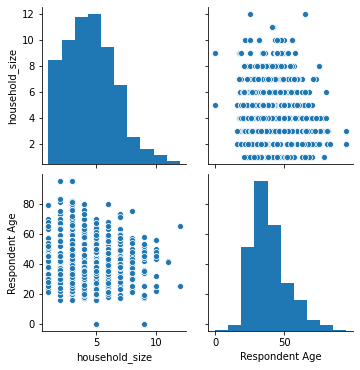

In [65]:
sns.pairplot(n)
plt.show()

In [74]:
n.describe()

,household_size,Respondent Age
count,1002.000000,1002.000000
mean,4.645709,38.903194
std,1.982749,13.193087
min,1.000000,0.000000
25%,3.000000,30.000000
50%,5.000000,36.000000
75%,6.000000,45.000000
max,12.000000,95.000000


In [75]:
n.mode()

,country,Has a Bank account,household_size,Respondent Age
0,Rwanda,Yes,5.0,35.0


In [62]:
o= Uganda.groupby('Has a Bank account')
yes4 = o.get_group("Yes")
p= yes4[['country','Has a Bank account','household_size','Respondent Age']]
p.head(10)

,country,Has a Bank account,household_size,Respondent Age
21445,Uganda,Yes,3.0,40.0
21450,Uganda,Yes,4.0,27.0
21473,Uganda,Yes,1.0,21.0
21478,Uganda,Yes,5.0,51.0
21483,Uganda,Yes,2.0,48.0
21494,Uganda,Yes,3.0,30.0
21499,Uganda,Yes,2.0,30.0
21505,Uganda,Yes,5.0,40.0
21507,Uganda,Yes,1.0,29.0
21522,Uganda,Yes,2.0,25.0


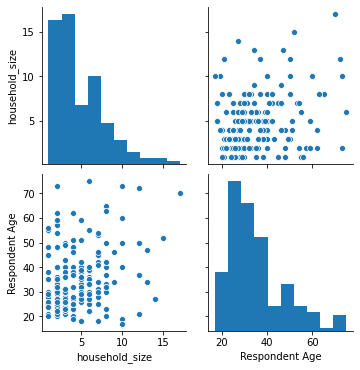

In [66]:
sns.pairplot(p)
plt.show()

In [72]:
p.describe()

,household_size,Respondent Age
count,181.000000,181.000000
mean,4.734807,34.834254
std,3.090551,12.491559
min,1.000000,17.000000
25%,2.000000,26.000000
50%,4.000000,31.000000
75%,6.000000,40.000000
max,17.000000,75.000000


In [73]:
p.mode()

,country,Has a Bank account,household_size,Respondent Age
0,Uganda,Yes,2.0,30.0


In [63]:
q= Tanzania.groupby('Has a Bank account')
yes5 = q.get_group("Yes")
r= yes5[['country','Has a Bank account','household_size','Respondent Age']]
r.head(10)

,country,Has a Bank account,household_size,Respondent Age
14807,Tanzania,Yes,3.0,24.0
14841,Tanzania,Yes,1.0,28.0
14842,Tanzania,Yes,3.0,63.0
14858,Tanzania,Yes,1.0,42.0
14875,Tanzania,Yes,1.0,44.0
14877,Tanzania,Yes,2.0,36.0
14896,Tanzania,Yes,2.0,28.0
14900,Tanzania,Yes,2.0,60.0
14912,Tanzania,Yes,1.0,31.0
14916,Tanzania,Yes,1.0,29.0


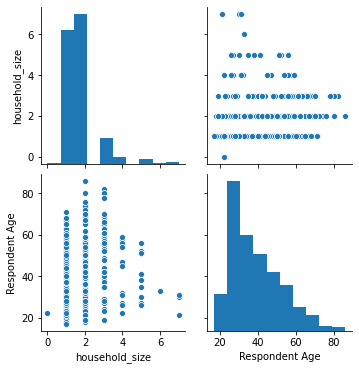

In [68]:
sns.pairplot(r)
plt.show()

In [69]:
r.describe()

,household_size,Respondent Age
count,602.000000,602.000000
mean,1.782392,38.852159
std,0.908907,13.391944
min,0.000000,17.000000
25%,1.000000,28.000000
50%,2.000000,36.000000
75%,2.000000,47.000000
max,7.000000,86.000000


In [78]:
r.mode()

,country,Has a Bank account,household_size,Respondent Age
0,Tanzania,Yes,2.0,30.0


From the various code above based on the different demographics we can see that in
UGANDA & TANZANIA - The household size most likely to have a bank account is those with value of 2 and the repondent age is 30
while in RWANDA it is higher where they are more likely to be at a higher household size of 5  while the respondent age is still higher at 35
And Finally in KENYA the household size at value of 1 while the respondent age stand at 30
insight on such a data on analysis is to include more countries on this data to give a clue on the financial inclusion on eastern africa so as to implement better strategies on the economies fully

